# COGS 108 - Final Project 

# Overview

The NFL season usually starts in September and ends in February. Across the 17-week regular season and the playoffs afterwards, weather conditions at a team’s home stadium could change substantially. Furthermore, teams not only play at their home stadiums, but also have to travel to other regions in the country, possibly with very different climate, to play away games. Therefore, it is expected that teams will play under different weather conditions throughout the season. Knowing the relationship between team performance and weather conditions will be useful to NFL teams so that they may adopt different strategies under different weather conditions and hold special training sessions before playing at their least favorite weather conditions.  


# Names

- Annie Wai
- Chen Xu
- Christopher Yeh
- Ronak Sheth
- Shun Fujinami
- Yupei Zhou

# Group Members IDs

- A12944645
- A13636618
- A15720503
- A92086612
- A14255552
- A13410536

# Research Question

Our question is how does weather, with an emphasis on temperature and wind speed affect the outcome of a National Football League (NFL) game. We will be analyzing the weather data during each NFL game, and seeing if the difference of a home team's acclimated weather and the current game's weather will play a significant factor in determining the outcome of the game.

## Background and Prior Work


There has been previous studies on how weather affects NFL games, even as far as betting lines being affected by the weather. According to Sports Betting Stats line-makers (bookies that determine the odds and payouts for betting on games) factor in temperature, precipitation, and wind speed when creating the betting odds. There has also been studies published by individuals based on data science which include “dome teams” (teams with an indoor stadium at home) playing in extreme weather, or the drop off of production by a quarterback in poor weather. Advanced Football Analytics analyzed data for when teams played in away stadiums and compared their home climate to the away climate. Most notably was “dome teams” not winning a single away game when the temperature was 20 degrees or lower. In another article Towards Data Science studied each quarterback’s statistics when playing in extreme weather. This article demonstrated a clear drop off in production of each quarterback when comparing their play in “great weather” versus “bad weather” Each of these previous studies narrowed down the data to specific scenarios, or a specific player’s position when analyzing the data. Our study will broaden the scope of how weather affects NFL games to every team, and every game in our dataset. This study will demonstrate how big a factor weather plays in determining the outcome of an NFL game in the grand scheme of all factors that play a part in winning an NFL game. 

References (include links): 
- 1) Sports Bettings Stats (https://www.sportsbettingstats.com/nfl/football-weather)
- 2) Advanced Football Analytics (http://archive.advancedfootballanalytics.com/2012/01/how-does-temperature-affect-road-teams.html)
- 3) Towards Data Science (https://towardsdatascience.com/football-weather-diving-into-the-effects-of-weather-on-nfl-qb-performance-f0edb420623d)

# Hypothesis


Our hypothesis is that the team with the nearest acclimated weather to the current game's weather will have a significantly higher chance of winning.

# Dataset(s)


- Dataset Name: NFL scores and betting data
- Link to the dataset: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data#spreadspoke_scores.csv
- Number of observations: 12400

This dataset includes 12,400 games since the 1966 season with 17 variables including: 
schedule date, schedule season, schedule week, schedule playoff, team home, score home, score away, team away, team favorite id, spread favorite, over under line, stadium, stadium neutral, weather temperature, weather wind mph, weather humidity, and extra weather detail.


# Setup


In [6]:
from scipy.stats import ttest_ind, chisquare, normaltest, ttest_1samp

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning


We created a dataframe from the dataset csv file. We will drop the following unused columns: schedule season, schedule week, schedule playoff, stadium neutral, team favorite id, spread favorite, and over under line. We will also drop any games played indoors.

In [7]:
df = pd.read_csv("./nfl-scores-and-betting-data/spreadspoke_scores.csv")
df = df.drop(columns=["schedule_season", "schedule_week", "schedule_playoff", "stadium_neutral", 
                      "team_favorite_id", "spread_favorite", "over_under_line"],
             axis=1)
df = df[df.weather_detail != "DOME"]

Based on the score of the home and away team, we want to add a column to indicate the outcome of the game.

In [8]:
for index, row in df.iterrows():
    score_home = df.loc[index]['score_home']
    score_away = df.loc[index]['score_away']
    if score_home > score_away:
        df.at[index, 'home_w_l_t'] = 'WIN'
    elif score_away > score_home:
        df.at[index, 'home_w_l_t'] = 'LOSS'
    else:
        df.at[index, 'home_w_l_t'] = 'TIE'

It would appear that most entries are missing weather humidity and weather detail, so we are dropping rows without weather humidity and the whole column of weather detail.

In [9]:
df.dropna(subset=['weather_humidity'], inplace = True)
df = df.drop(columns = ['weather_detail'])
df.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_w_l_t
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,LOSS
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,WIN
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,WIN
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,LOSS
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,WIN


Here we'll gather the temperature and wind speed data separately.

In [10]:
temp_win = []
temp_tie = []
temp_loss = []
wind_win = []
wind_tie = []
wind_loss = []

for index, row in df.iterrows():
    if row["home_w_l_t"] == "WIN":
        temp_win.append(row["weather_temperature"])
        wind_win.append(row["weather_wind_mph"])
    elif row["home_w_l_t"] == "TIE":
        temp_tie.append(row["weather_temperature"])
        wind_tie.append(row["weather_wind_mph"])
    else:
        temp_loss.append(row["weather_temperature"])
        wind_loss.append(row["weather_wind_mph"])

# Data Analysis & Results

Here we will graph histograms for game outcomes and temperature.

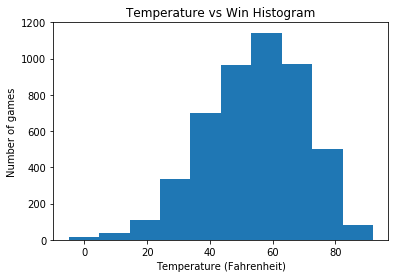

In [17]:
# temp_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_temperature"])
plt.title("Temperature vs Wins Histogram")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of games")
plt.show()

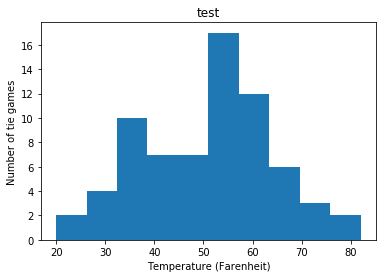

In [16]:
# temp_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_temperature"])
plt.title("Temperature vs Ties Histogram")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of games")
plt.show()


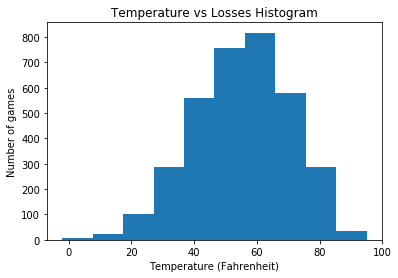

In [18]:
# temp_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_temperature"])
plt.title("Temperature vs Losses Histogram")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Number of games")
plt.show()

Histograms for game outcomes and wind speeds

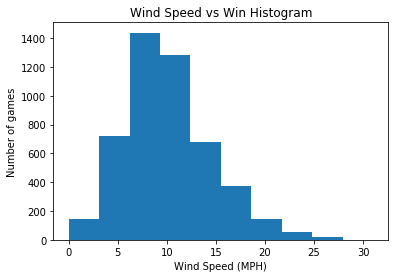

In [20]:
# wind_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_wind_mph"])
plt.title("Wind Speed vs Wins Histogram")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Number of games")
plt.show()

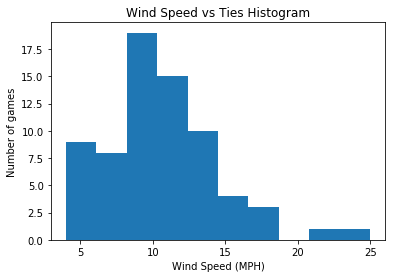

In [21]:
# wind_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_wind_mph"])
plt.title("Wind Speed vs Ties Histogram")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Number of games")
plt.show()

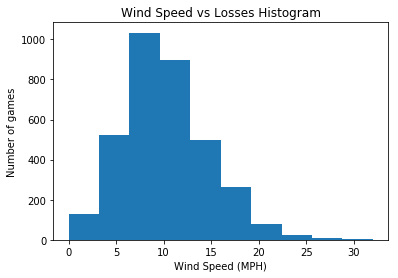

In [22]:
# wind_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_wind_mph"])
plt.title("Wind Speed vs Losses Histogram")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Number of games")
plt.show()

We will now do a t-test to check whether there is a statistically significant difference between **Temperature vs Wins** and **Temperature vs Losses**.

In [27]:
t_val_weather, p_val_weather = ttest_ind(temp_win, temp_loss)
t_val_weather, p_val_weather

(-2.7410490442999609, 0.0061374191033584918)

Indeed there is a statistically significant difference, as the p-value is very small.

We will now do a t-test to check whether there is a statistically significant difference between **Wind Speed vs Wins** and **Wind Speed vs Losses**.

In [29]:
t_val_wind, p_val_wind = ttest_ind(wind_win, wind_loss)
t_val_wind, p_val_wind

(1.4349573206864878, 0.15133686599379564)

The t-test does not yield a small p-value, so we cannot conclude that there is a statistically significant difference.

In [33]:
# Make a copy of df
df1 = df.copy()

We are now going to compute the average temperature of all the games won by each team. The averages will be saved as a new column '*avg_temperature*'

In [34]:
df1['avg_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.mean)

Compute the standard deviation of temperature of all the games won by each team and store in new column '*std_temperature*'

In [35]:
df1['std_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.std)

With standard deviation and average for each team, we will compute the z-score and store as a new column '*z_score_temperature*'

In [36]:
# With average and standard deviation of each group already computed, we can proceed to compute the z-score.
# The z-scores are saved as a new column 'z_score_temperature'
df1['z_score_temperature'] = (df1['weather_temperature'] - df1['avg_temperature']) / df1['std_temperature']

In [37]:
df1.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_w_l_t,avg_temperature,std_temperature,z_score_temperature
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,LOSS,76.254386,6.995335,0.964302
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,WIN,79.000000,2.828427,0.707107
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,WIN,63.828877,7.095555,0.869717
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,LOSS,76.254386,6.995335,0.821349
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,WIN,42.695652,16.134627,1.320412


We want to see if there are any correlation with the outcome of the game based on the difference of temperature from their average home temperature.

In [38]:
df1['diff_temperature'] = df1['avg_temperature'] - df1['weather_temperature']
df1.head()

,schedule_date,team_home,score_home,score_away,team_away,stadium,weather_temperature,weather_wind_mph,weather_humidity,home_w_l_t,avg_temperature,std_temperature,z_score_temperature,diff_temperature
0,09/02/1966,Miami Dolphins,14,23,Oakland Raiders,Orange Bowl,83.0,6.0,71,LOSS,76.254386,6.995335,0.964302,-6.745614
1,09/03/1966,Houston Oilers,45,7,Denver Broncos,Rice Stadium,81.0,7.0,70,WIN,79.000000,2.828427,0.707107,-2.000000
2,09/04/1966,San Diego Chargers,27,7,Buffalo Bills,Balboa Stadium,70.0,7.0,82,WIN,63.828877,7.095555,0.869717,-6.171123
3,09/09/1966,Miami Dolphins,14,19,New York Jets,Orange Bowl,82.0,11.0,78,LOSS,76.254386,6.995335,0.821349,-5.745614
4,09/10/1966,Green Bay Packers,24,3,Baltimore Colts,Lambeau Field,64.0,8.0,62,WIN,42.695652,16.134627,1.320412,-21.304348


Text(0, 0.5, 'Density')

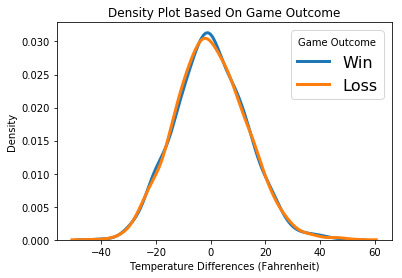

In [40]:
loss_temp = df1.loc[df1['home_w_l_t'] == 'LOSS']
win_temp = df1.loc[df1['home_w_l_t'] == 'WIN']
#tie_temp = df1.loc[df1['home_w_l_t'] == 'TIE'] #TODO possibly take this out



sns.distplot(loss_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Win')
sns.distplot(win_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Loss')
#sns.distplot(tie_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Tie')

plt.legend(prop={'size': 16}, title = 'Game Outcome')
plt.title('Density Plot Based On Game Outcome')
plt.xlabel('Temperature Differences (Fahrenheit)')
plt.ylabel('Density')

# Ethics and Privacy

We don’t have any privacy issues regarding this data as it was built from publicly available data published by the National Football League (NFL), as well as publicly available weather data from the National Oceanic and Atmospheric Administration (NOAA). There may be some potential biases in our dataset, mainly in the betting variables such as favorite id, spread favorite, and over under line. Since we did not use any of the betting data and the remaining variables that we did use are concrete numbers, we would not run into issues with biases in the data we’ve used. We do expect the national organizations to provide bias data such as game outcomes or weather data.

The ramifications of the results of this study could span to the population who places bets on the outcomes of NFL games, and this study could be used to predict unlikely outcomes. Our conclusion may possibly affect the betting odds that line-makers create. In addition to betting odds being affected, bet placers will also be affected by the findings of this study. Changes in the betting odds, as well as betting trends followed by bet placers can affect personal affairs regarding a person’s economic status. 

It is also important to consider the privacy and reputation of the sports teams analyzed, as negative attention to a team’s performance or brand may negatively affect their public opinion. As many people such as players, coaches, and reporters revolve their careers around NFL games, affecting the popularity of sports teams may negatively affect their careers. 

# Conclusion

Our analyses after creating both our histograms and prediction calculations were unfruitful in relation to our prediction. Our original hypothesis was that a stadium's humidity and wind speed had a factor in how the home team performed, but as it quickly showed no correlation in our histograms it was disregarded.
We then moved on to average winning temperature. It was promising, as there was a variety in the average winning temperature. However, on inspection of our plotted map, it was mostly just due to average temperature of a stadium in general, with warmer performing teams being more south in the U.S., and colder teams performing better in the north-east. This is not insignificant, however, as we could use this data to run prediction simulators to determine whether a team at an away game has a higher chance to win if the temperature is closer to their average winning temperature.
Running the simulator, we had a prediction rating of 51%, which was disappointing, as it was just flipping a coin. We discovered that many teams in the prediction we were running actually never played each other in our dataset. We altered it to just have the team with the higher win ratio win in that situation, and our prediction rating went up to 62%, which is also due to the fact that a better scoring team may just win regardless of weather.
So in conclusion, we have determined that average winning temperature is mostly irrelevant to the outcome of a game, and humidity and wind speed is also not particularly useful to determine the outcome of a game, pertaining to the number of game data we collected.

# Discussion

As even with more than 10,000 games played as data, as we consider there to be 41 distinct football teams, there were few games
played for each possible match-up, with some teams never even playing a match, and so our predictions, while significant, did not match with our original hypothesis.
This is also considering the fact that many teams had short-lived careers or changed their brand to another city or team name, which we could combine for more match-ups and therefore different outcomes for our predictions.


# Future Work

With more datasets and better distinguished teams, and we could also analyze other elements of game statistics, such as at what temperature injuries are more likely to occur, player fatigue and switching, and performance statistics of individual players.
Perhaps we can also use categorical data, such as whether it was raining or snowing, the frequency that
teams have experience in that condition, and their likeliness to win from that data.
